In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import random
from pandas import DataFrame
from sklearn import tree
import collections

# 2b

In [123]:
Score_Threshold = [0.95, 0.85, 0.75, 0.65, 0.55, 0.45, 0.35, 0.25, 0.15, 0.05]
TP = [2, 7, 14, 21, 25, 27, 29, 29, 30, 30]
FP = [0, 1, 3, 7, 10, 20, 35, 45, 60, 70]
TPR = [x / 30 for x in TP]
FPR = [x / 70 for x in FP]

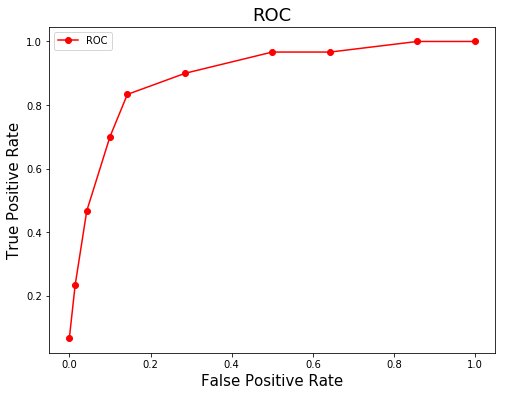

In [127]:
plt.figure(figsize=(8,6))
plt.plot(FPR, TPR, linestyle='solid', color='red', marker='o', label="ROC")
plt.xlabel("False Positive Rate", fontsize=15)
plt.ylabel("True Positive Rate", fontsize=15)
plt.title("ROC", fontsize=18)
plt.legend()
plt.show()

# 3a.(i)

In [11]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [48]:
data = pd.DataFrame(cancer.data, columns=[cancer.feature_names])
features =list(pd.DataFrame(cancer.feature_names))

In [70]:
target = pd.DataFrame(cancer.target)

In [85]:
y = target[0]
clf = tree.DecisionTreeClassifier(min_samples_leaf=50)
clf = clf.fit(data,y)
print(tree.export_graphviz(clf,None))

digraph Tree {
node [shape=box] ;
0 [label="X[20] <= 16.795\ngini = 0.468\nsamples = 569\nvalue = [212, 357]"] ;
1 [label="X[27] <= 0.133\ngini = 0.159\nsamples = 379\nvalue = [33, 346]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[1] <= 21.435\ngini = 0.03\nsamples = 329\nvalue = [5, 324]"] ;
1 -> 2 ;
3 [label="X[7] <= 0.033\ngini = 0.007\nsamples = 269\nvalue = [1, 268]"] ;
2 -> 3 ;
4 [label="gini = 0.0\nsamples = 219\nvalue = [0, 219]"] ;
3 -> 4 ;
5 [label="gini = 0.039\nsamples = 50\nvalue = [1, 49]"] ;
3 -> 5 ;
6 [label="gini = 0.124\nsamples = 60\nvalue = [4, 56]"] ;
2 -> 6 ;
7 [label="gini = 0.493\nsamples = 50\nvalue = [28, 22]"] ;
1 -> 7 ;
8 [label="X[27] <= 0.153\ngini = 0.109\nsamples = 190\nvalue = [179, 11]"] ;
0 -> 8 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
9 [label="gini = 0.343\nsamples = 50\nvalue = [39, 11]"] ;
8 -> 9 ;
10 [label="gini = 0.0\nsamples = 140\nvalue = [140, 0]"] ;
8 -> 10 ;
}


# 3a.(ii)

In [130]:
import sklearn.metrics as metrics
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=1, min_samples_leaf=50)
clf = clf.fit(data,y)
print('Confusion Matrix for training')
print(metrics.confusion_matrix(y,clf.predict(data)))

Confusion Matrix for training
[[179  33]
 [ 11 346]]


From the decision tree with max_depth as 1, First classification looks like value = [212, 357] is divided into nvalue = [33, 346] which is true classification and value = [179, 11]"] which is false classification.

In the above confusion matrix first column is a false classification and 2nd column is a true classification.

In [79]:
print("Kappa:", metrics.cohen_kappa_score(y,clf.predict(data)))
print('F1 score:', metrics.f1_score(y,clf.predict(data)))
print('Recall:', metrics.recall_score(y,clf.predict(data)))
print('Precision:', metrics.precision_score(y,clf.predict(data)))

Kappa: 0.8310410452293863
F1 score: 0.9402173913043479
Recall: 0.969187675070028
Precision: 0.9129287598944591


# 3a.(iii)

In [81]:
import sklearn.model_selection as ms
print('Confusion matrix for cross-validation')
kfold = ms.StratifiedKFold(n_splits=10,shuffle=False)
print(metrics.confusion_matrix(y,ms.cross_val_predict(clf,data,y,cv=kfold)))

Confusion matrix for cross-validation
[[169  43]
 [ 18 339]]


In [82]:
print("Kappa:", metrics.cohen_kappa_score(y,ms.cross_val_predict(clf,data,y,cv=kfold)))
print('F1 score:', metrics.f1_score(y,ms.cross_val_predict(clf,data,y,cv=kfold)))
print('Recall:', metrics.recall_score(y,ms.cross_val_predict(clf,data,y,cv=kfold)))
print('Precision:', metrics.precision_score(y,ms.cross_val_predict(clf,data,y,cv=kfold)))

Kappa: 0.7650717800504931
F1 score: 0.9174560216508795
Recall: 0.9495798319327731
Precision: 0.887434554973822


# 3b.(i)

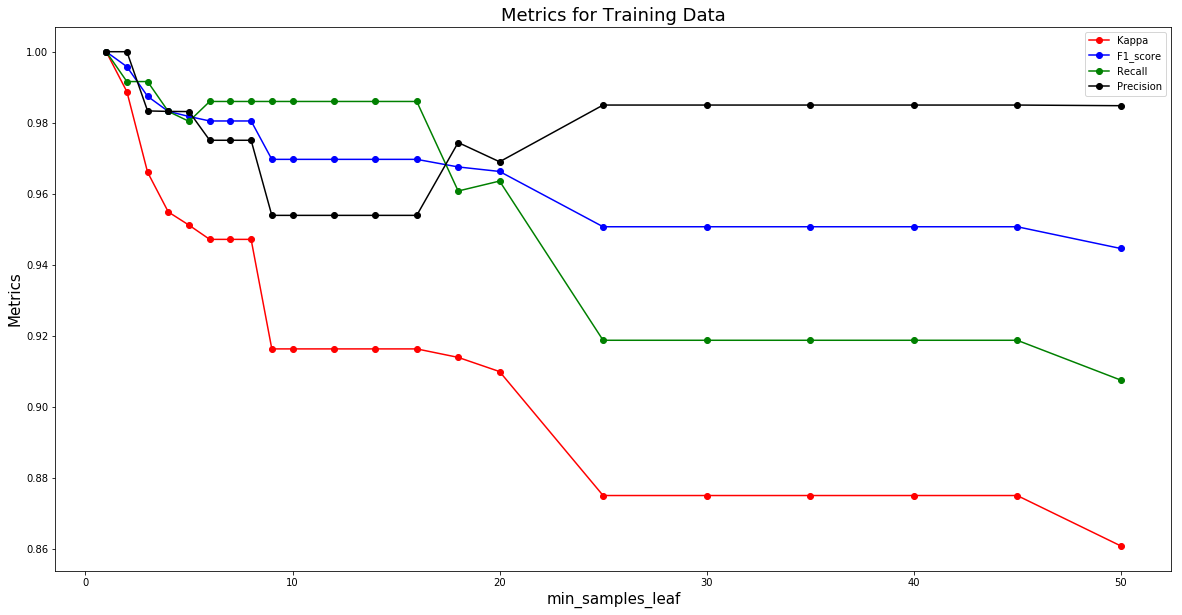

In [120]:
mylist = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20, 25, 30, 35, 40, 45, 50]
Kappa = []
F1_score = []
Recall = []
Precision = []
for i in range(len(mylist)):
    clf = tree.DecisionTreeClassifier(min_samples_leaf=mylist[i])
    clf = clf.fit(data,y)
    Kappa.append(metrics.cohen_kappa_score(y,clf.predict(data)))
    F1_score.append(metrics.f1_score(y,clf.predict(data)))
    Recall.append(metrics.recall_score(y,clf.predict(data)))
    Precision.append(metrics.precision_score(y,clf.predict(data)))

plt.figure(figsize=(20,10))
plt.plot(mylist, Kappa, linestyle='solid', color='red', marker='o', label="Kappa")
plt.plot(mylist, F1_score, linestyle='solid', color='blue', marker='o', label="F1_score")
plt.plot(mylist, Recall, linestyle='solid', color='green', marker='o', label="Recall")
plt.plot(mylist, Precision, linestyle='solid', color='black', marker='o', label="Precision")
plt.xlabel("min_samples_leaf", fontsize=15)
plt.ylabel("Metrics", fontsize=15)
plt.title("Metrics for Training Data", fontsize=18)
plt.legend()
plt.show()

# 3b.(ii)

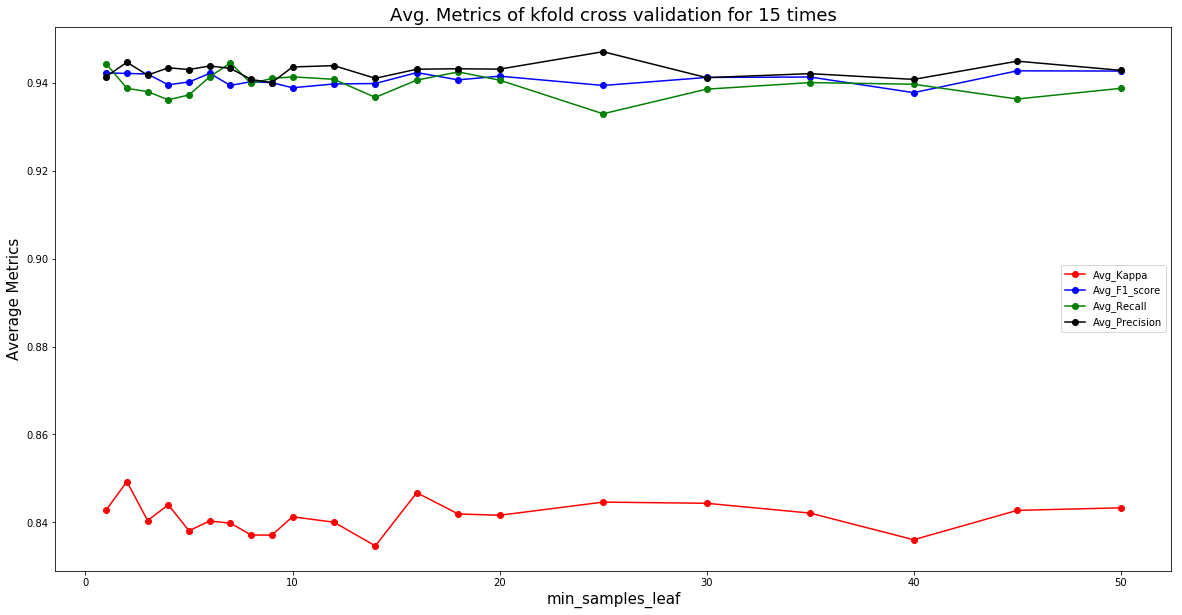

In [117]:
import statistics 
Avg_Kappa = []
Avg_F1_score = []
Avg_Recall = []
Avg_Precision = []
for i in range(len(mylist)):
    Kappa = []
    F1_score = []
    Recall = []
    Precision = []
    for j in range(1,16):
        clf = tree.DecisionTreeClassifier(min_samples_leaf=mylist[j])
        clf = clf.fit(data,y)
        kfold = ms.StratifiedKFold(n_splits=10,shuffle=True)
        Kappa.append(metrics.cohen_kappa_score(y,ms.cross_val_predict(clf,data,y,cv=kfold)))
        F1_score.append(metrics.f1_score(y,ms.cross_val_predict(clf,data,y,cv=kfold)))
        Recall.append(metrics.recall_score(y,ms.cross_val_predict(clf,data,y,cv=kfold)))
        Precision.append(metrics.precision_score(y,ms.cross_val_predict(clf,data,y,cv=kfold)))
    Avg_Kappa.append(statistics.mean(Kappa))
    Avg_F1_score.append(statistics.mean(F1_score))
    Avg_Recall.append(statistics.mean(Recall))
    Avg_Precision.append(statistics.mean(Precision))

plt.figure(figsize=(20,10))
plt.plot(mylist, Avg_Kappa, linestyle='solid', color='red', marker='o', label="Avg_Kappa")
plt.plot(mylist, Avg_F1_score, linestyle='solid', color='blue', marker='o', label="Avg_F1_score")
plt.plot(mylist, Avg_Recall, linestyle='solid', color='green', marker='o', label="Avg_Recall")
plt.plot(mylist, Avg_Precision, linestyle='solid', color='black', marker='o', label="Avg_Precision")
plt.xlabel("min_samples_leaf", fontsize=15)
plt.ylabel("Average Metrics", fontsize=15)
plt.title("Avg. Metrics of kfold cross validation for 15 times", fontsize=18)
plt.legend()
plt.show()

From the above two figures, we can say that average metrics with kfold=10 and shuffled=True when ran for 15 times remains almost constant unlike when ran for one time. Upon observing above figure, average Kappa metric values for every min_samples_leaf recorded small/less values when compared with other three metrics.